___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

<b> Відкрийте файл та виведіть описову статистику

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("loan_data.csv")
df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

<b> Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

Text(0, 0.5, 'Count')

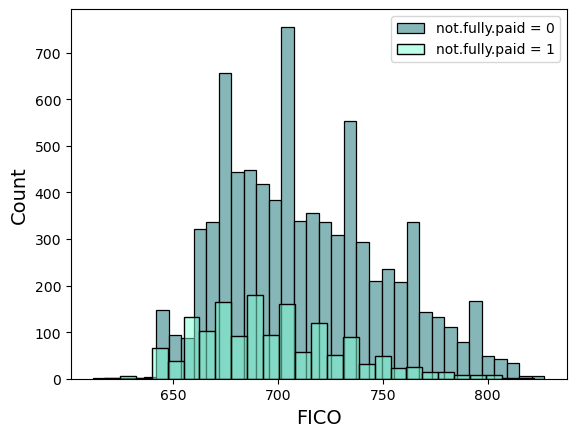

In [5]:
#Plotting histograms
import seaborn as sns
import matplotlib.pyplot as plt

# First I create two datasets for '1' or '0' 'not.fully.paid'
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

#Second I plot the needed histograms

ax=sns.histplot(df_0['fico'], color='cadetblue', label='not.fully.paid = 0')
ax=sns.histplot(df_1['fico'], color='aquamarine', alpha=0.5, label='not.fully.paid = 1')
plt.legend()
ax.set_xlabel('FICO', fontsize=14)
ax.set_ylabel('Count', fontsize=14)


In [6]:
#From the above histograms we can see that the majority of clients fully paid depts.
#Also we can see that persons with hight FICO rating in majority of cases have fully-paid status.
#Also it can be seen that the most number of clients are clients with low and middle FICO ratings

<b> Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

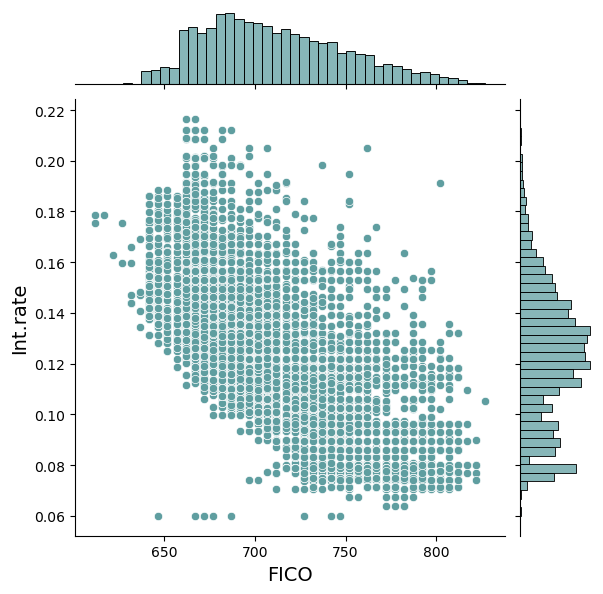

In [7]:
#Plotting joint plot
pl=ax=sns.jointplot(x='fico', y='int.rate', data=df, color='cadetblue')
pl.set_axis_labels('FICO', 'Int.rate', fontsize=14)

In [8]:
#From this jointplot we can see that clients with low FICO ratings have high int rate.

<b> Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. 
Розбийте по значеннях цільової функції

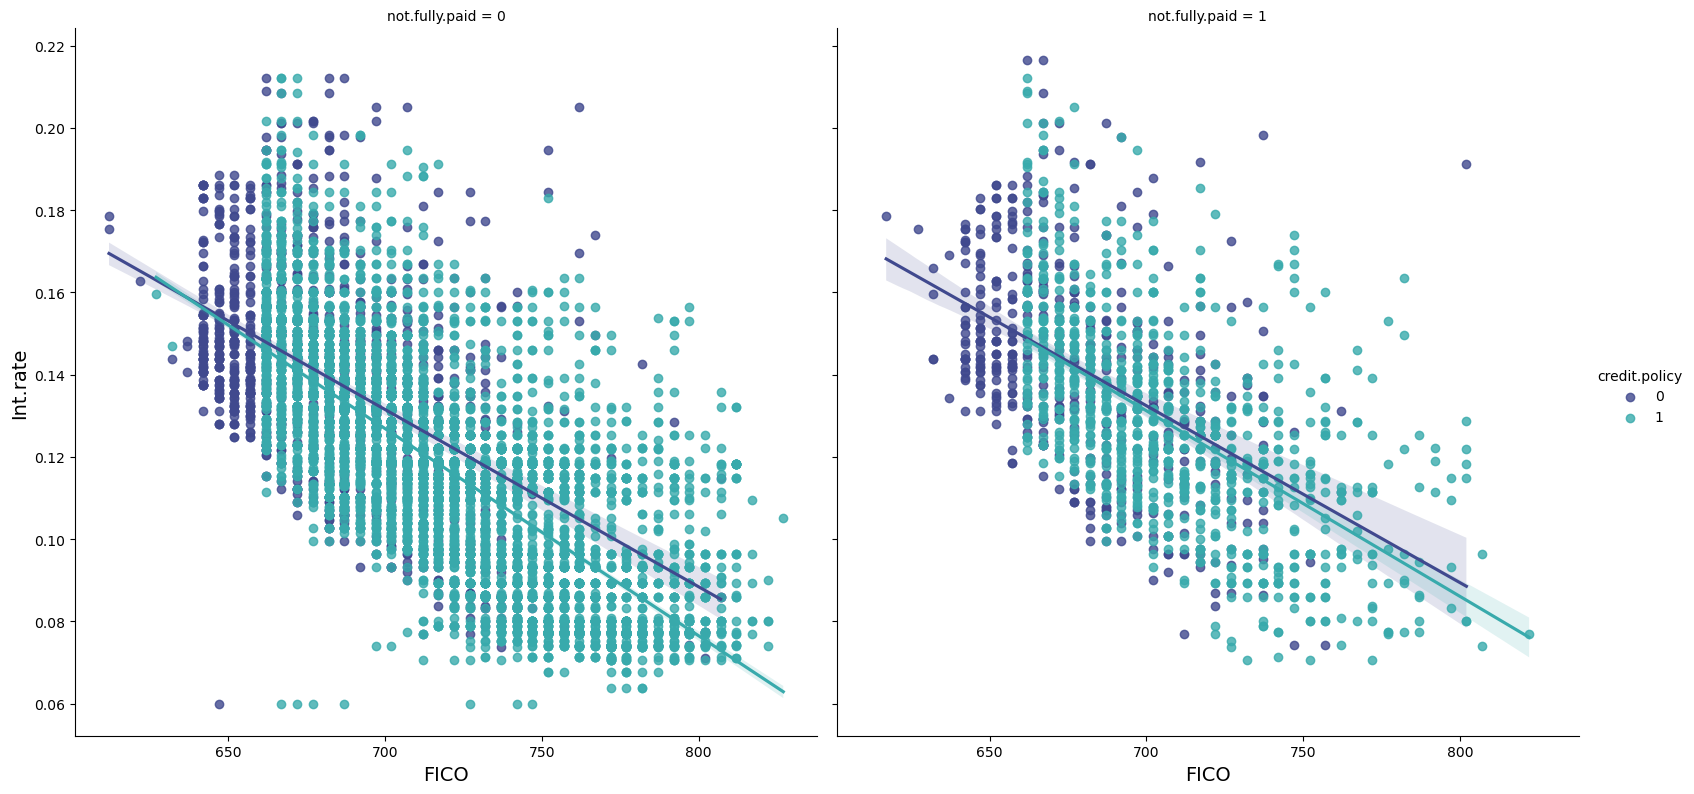

In [9]:
# Creating lmplot
lm=sns.lmplot(x="fico", y="int.rate", col = 'not.fully.paid', hue="credit.policy", data=df, height=8, palette='mako')
lm.set_axis_labels('FICO', 'Int.rate', fontsize=14)

In [10]:
#From this plot we can see that clients with middle FICO ratings both can have positive and negative status in credit policy.
#CLients who do not pay loan fully in the majority of cases cave credit policy status = 0 and low FICO ratings.

<b> purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [11]:
dummy_df = pd.get_dummies(df['purpose'], prefix='purp', drop_first = True)
dummy_df

purp_credit_card  purp_debt_consolidation  purp_educational  \
0                    0                        1                 0   
1                    1                        0                 0   
2                    0                        1                 0   
3                    0                        1                 0   
4                    1                        0                 0   
...                ...                      ...               ...   
9573                 0                        0                 0   
9574                 0                        0                 0   
9575                 0                        1                 0   
9576                 0                        0                 0   
9577                 0                        1                 0   

      purp_home_improvement  purp_major_purchase  purp_small_business  
0                         0                    0                    0  
1                         0                    0                    0  
2                         0                    0                    0  
3                         0                    0                    0  
4                         0                    0                    0  
...                     ...                  ...                  ...  
9573                      0                    0                    0  
9574                      0                    0                    0  
9575                      0                    0                    0  
9576                      1                    0                    0  
9577                      0                    0                    0  

[9578 rows x 6 columns]

In [12]:
df = pd.concat([df, dummy_df], axis=1)
df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  purp_credit_card  \
0                  0            0        0               0                 0   
1                  0            0        0               0                 1   
2                  1            0        0               0                 0   
3                  1            0        0               0                 0   
4                  0            1        0               0                 1   
...              ...          ...      ...             ...               ...   
9573               2            0        0               1                 0   
9574               5            0        0               1                 0   
9575               8            0        0               1                 0   
9576               5            0        0               1                 0   
9577               6            0        0               1                 0   

      purp_debt_consolidation  purp_educational  purp_home_improvement  \
0                           1                 0                      0   
1                           0                 0                      0   
2                           1                 0                      0   
3                           1                 0                      0   
4                           0                 0                      0   
...                       ...               ...                    ...   
9573                        0                 0                      0   
9574                        0                 0                      0   
9575                        1                 0                      0   
9576                        0                 0                      1   
9577                        1                 0                      0   

      purp_major_purchase  purp_small_business  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  
...                   ...                  ...  
9573                    0                    0  
9574                  

In [13]:
df=df.drop('purpose', axis=1)
df

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purp_credit_card  purp_debt_consolidation  \
0           0               0                 0                        1   
1           0               0                 1                        0   
2           0               0                 0                        1   
3           0               0                 0                        1   
4           0               0                 1                        0   
...       ...             ...               ...                      ...   
9573        0               1                 0                        0   
9574        0               1                 0                        0   
9575        0               1                 0                        1   
9576        0               1                 0                        0   
9577        0               1                 0                        1   

      purp_educational  purp_home_improvement  purp_major_purchase  \
0                    0                      0                    0   
1                    0                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    0                      0                    0   
...                ...                    ...                  ...   
9573                 0                      0                    0   
9574                 0                      0                    0   
9575                 0                      0                    0   
9576                 0                      1                    0   
9577                 0                      0                    0   

      purp_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
9573                    0  
9574                    0  
9575                    0  
9576                    0  
9577                    0  

[9578 rows x 19 columns]

<b> Розбийте датасет на тестoві та трейнові дані

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('not.fully.paid', axis = 1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

<b> Використайте для задачі класифікації такі моделі: дерево рішень

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

#default 'max_depth=None'
dtmodel = DecisionTreeClassifier(random_state= 42)

dtmodel.fit(X_train, y_train)

scores = cross_val_score(dtmodel, X, y, cv=5)

print('Train Score', dtmodel.score(X_train,y_train))
print('Test Score', dtmodel.score(X_test,y_test))
print('Cross-validation scores:', scores)
print('Average score:', np.mean(scores))

Train Score 1.0
Test Score 0.7352122477383438
Cross-validation scores: [0.74008351 0.73643006 0.75365344 0.73629243 0.27101828]
Average score: 0.6474955439149228


In [16]:
#choose the optimal depth (look not only at score, but also at confusion matrix)
for i in range(1, 12):
    print(f'--------{i}--------')
    treemodel = DecisionTreeClassifier(max_depth=i, random_state= 42)
    treemodel.fit(X_train, y_train)
    print('Train Score', treemodel.score(X_train,y_train))
    print('Test Score', treemodel.score(X_test,y_test))

--------1--------
Train Score 0.8408412887828163
Test Score 0.83785664578984
--------2--------
Train Score 0.8408412887828163
Test Score 0.83785664578984
--------3--------
Train Score 0.8412887828162291
Test Score 0.8347251217814892
--------4--------
Train Score 0.8447195704057279
Test Score 0.8361169102296451
--------5--------
Train Score 0.8480011933174224
Test Score 0.8354210160055672
--------6--------
Train Score 0.8544152744630071
Test Score 0.8305497564370216
--------7--------
Train Score 0.8600835322195705
Test Score 0.826722338204593
--------8--------
Train Score 0.8672434367541766
Test Score 0.8305497564370216
--------9--------
Train Score 0.8751491646778043
Test Score 0.8208072372999304
--------10--------
Train Score 0.8827565632458234
Test Score 0.8180236604036186
--------11--------
Train Score 0.8893198090692124
Test Score 0.8148921363952679


In [17]:
#apply the best max depth
treemodel = DecisionTreeClassifier(max_depth=8, random_state= 42)

treemodel.fit(X_train, y_train)

tr_train_score=round(treemodel.score(X_train,y_train), 4)
tr_test_score=round(treemodel.score(X_test,y_test), 4)
tr_scores = cross_val_score(treemodel, X, y, cv=5)
tr_av_scores = round(np.mean(tr_scores), 4)


print('Train Score', tr_train_score)
print('Test Score', tr_test_score)

print('CV scores:', tr_scores)
print('Average CV score:', tr_av_scores)

Train Score 0.8672
Test Score 0.8305
CV scores: [0.82515658 0.82306889 0.83559499 0.81305483 0.29451697]
Average CV score: 0.7183


In [18]:
#make predict and get the report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


tr_y_pred = treemodel.predict(X_test)
print(classification_report(y_test, tr_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2408
           1       0.41      0.10      0.16       466

    accuracy                           0.83      2874
   macro avg       0.63      0.54      0.53      2874
weighted avg       0.78      0.83      0.78      2874



In [19]:
#it is also possible to print out all the results of the classification report separatedly:
report = classification_report(y_test, tr_y_pred, output_dict=True)

precision_0 = round(report['0']['precision'], 4)
recall_0 = round(report['0']['recall'], 4)
f1_0 = round(report['0']['f1-score'], 4)

precision_1 = round(report['1']['precision'], 4)
recall_1 = round(report['1']['recall'], 4)
f1_1 = round(report['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0)
print("Recall:", recall_0)
print("F1-score:", f1_0)
print()
print("Class 1:")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Class 0:
Precision: 0.8479
Recall: 0.9722
F1-score: 0.9058

Class 1:
Precision: 0.4071
Recall: 0.0987
F1-score: 0.1589


In [20]:
# get the confusion matrix
cm_tr = confusion_matrix(y_test, tr_y_pred)
print(cm_tr)

[[2341   67]
 [ 420   46]]


In [21]:
#it is also possible to extract and print separatedly all the components of the confusion matrix
tn = cm_tr[0, 0]  # True Negative
fp = cm_tr[0, 1]  # False Positive
fn = cm_tr[1, 0]  # False Negative
tp = cm_tr[1, 1]  # True Positive


print("Confusion Matrix:")
print(cm_tr)
print()
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Positive (TP):", tp)


Confusion Matrix:
[[2341   67]
 [ 420   46]]

True Negative (TN): 2341
False Positive (FP): 67
False Negative (FN): 420
True Positive (TP): 46


In [22]:
#Now we can create a dict for all models (dicts in a dict)
# !!! I used precision, recalls and f1 seperatedly to observe if they are harmonic/balanced between '0' and '1' 
models_dict = {}

In [23]:
metrics_dict = {
        'accuracy train': tr_train_score,
        'accuracy test': tr_test_score,
        'average CV score': tr_av_scores,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'f1_0': f1_0,
        'f1_1': f1_1
    }
    

models_dict['DecisionTreeClassifier'] = metrics_dict

# print(models_dict)

In [24]:
#to visualize the DecisionTree we can use dtreeviz
import graphviz
import dtreeviz

viz = dtreeviz.model(treemodel,
                        X_train,
                        y_train,
                        target_name='not.fully.paid',
                        feature_names=X_train.columns,
                        class_names=['Fully Paid', 'Not Fully Paid'])
viz.view()

C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [25]:
#we could try to find features which are more or less important

importances = treemodel.feature_importances_
feature_names = X.columns.tolist()

# Associate feature names with feature importance scores in a dictionary
importances_dict = dict(zip(feature_names, importances))

# Print feature importance scores sorted by importance
sorted_importances = sorted(importances_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

int.rate: 0.1975
credit.policy: 0.1335
installment: 0.0982
fico: 0.0830
revol.bal: 0.0806
revol.util: 0.0731
days.with.cr.line: 0.0719
inq.last.6mths: 0.0690
dti: 0.0634
log.annual.inc: 0.0594
pub.rec: 0.0274
purp_small_business: 0.0246
purp_home_improvement: 0.0100
delinq.2yrs: 0.0063
purp_debt_consolidation: 0.0020
purp_credit_card: 0.0000
purp_educational: 0.0000
purp_major_purchase: 0.0000


In [26]:
#we try to create new dataset of only important features

X = df.drop(['not.fully.paid', 'purp_credit_card', 'purp_educational', 'purp_major_purchase', 
            'purp_debt_consolidation', 'purp_home_improvement',
            'purp_small_business', 'delinq.2yrs', 'pub.rec'], axis = 1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [27]:
#apply this variant with reduced number of features

treefmodel = DecisionTreeClassifier(max_depth=8, random_state= 42)

treefmodel.fit(X_train, y_train)

train_score=round(treefmodel.score(X_train,y_train), 4)
test_score=round(treefmodel.score(X_test,y_test), 4)
scores = cross_val_score(treefmodel, X, y, cv=5)
av_scores = round(np.mean(scores), 4)

print('Train Score', train_score)
print('Test Score', test_score)

print('CV scores:', scores)
print('Average CV score:', av_scores)

Train Score 0.869
Test Score 0.825
CV scores: [0.81732777 0.83194154 0.83350731 0.8381201  0.2924282 ]
Average CV score: 0.7227


In [28]:
y_pred = treefmodel.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

precision_0 = round(report['0']['precision'], 4)
recall_0 = round(report['0']['recall'], 4)
f1_0 = round(report['0']['f1-score'], 4)

precision_1 = round(report['1']['precision'], 4)
recall_1 = round(report['1']['recall'], 4)
f1_1 = round(report['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0)
print("Recall:", recall_0)
print("F1-score:", f1_0)
print()
print("Class 1:")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Class 0:
Precision: 0.8452
Recall: 0.9684
F1-score: 0.9027

Class 1:
Precision: 0.3391
Recall: 0.0837
F1-score: 0.1343


In [29]:
tr = confusion_matrix(y_test, y_pred)

tn = tr[0, 0]  # True Negative
fp = tr[0, 1]  # False Positive
fn = tr[1, 0]  # False Negative
tp = tr[1, 1]  # True Positive


print("Confusion Matrix:")
print(tr)
print()
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Positive (TP):", tp)

Confusion Matrix:
[[2332   76]
 [ 427   39]]

True Negative (TN): 2332
False Positive (FP): 76
False Negative (FN): 427
True Positive (TP): 39


In [30]:
#the results of predicting positive became worse so it is not worth to omit the 'weak' features

In [31]:
metrics_dict = {
        'accuracy train': train_score,
        'accuracy test': test_score,
        'average CV score': av_scores,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'f1_0': f1_0,
        'f1_1': f1_1
    
    }
    

models_dict['DecTreeClassImportantFeatures'] = metrics_dict

# print(models_dict)

In [32]:
#Instead we can try to find outliers in the most important features with EllipticEnvelope and to drop them 
# Create an instance of the EllipticEnvelope class
from sklearn.covariance import EllipticEnvelope

envelope = EllipticEnvelope(contamination=0.05)

# Fit the model to the data
envelope.fit(X)

# Predict the outliers
outliers = envelope.predict(X)

# Add a column to the dataframe with the outliers (-1 for outliers, 1 for inliers)
df['outlier'] = outliers

# Print the dataframe
print(df)

      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958

In [33]:
df_wo_outliers = df[df['outlier'] != -1]
df_wo_outliers

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9572              0    0.1565        69.98       10.110472   7.02   662   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9572        8190.041667       2999        39.5               6            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purp_credit_card  purp_debt_consolidation  \
0           0               0                 0                        1   
1           0               0                 1                        0   
2           0               0                 0                        1   
3           0               0                 0                        1   
4           0               0                 1                        0   
...       ...             ...               ...                      ...   
9572        0               1                 0                        1   
9574        0               1                 0                        0   
9575        0               1                 0                        1   
9576        0               1                 0                        0   
9577        0               1                 0                        1   

      purp_educational  purp_home_improvement  purp_major_purchase  \
0                    0                      0                    0   
1                    0                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    0                      0                    0   
...                ...                    ...                  ...   
9572                 0                      0                    0   
9574                 0                      0                    0   
9575                 0                      0                    0   
9576                 0                      1                    0   
9577                 0                      0                    0   

      purp_small_business  outlier  
0                       0        1  
1                       0        1  
2                       0        1  
3                       0        1  
4                       0        1  
...                   ...      ...  
9572                    0        1  
9574                    0        1  
9575                    0        1  
9576                    0       

In [34]:
df_wo_outliers = df_wo_outliers.drop(['outlier'], axis=1)

In [35]:
#Now we can try the same model but on dataframe without outliers (df_wo_outliers)
X_EE = df_wo_outliers.drop('not.fully.paid', axis = 1)
y_EE = df_wo_outliers['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X_EE, y_EE, test_size = 0.3, random_state= 42)

In [36]:
treemodel_EE = DecisionTreeClassifier(max_depth=8, random_state= 42)

treemodel_EE.fit(X_train, y_train)

train_score_EE=round(treemodel_EE.score(X_train,y_train), 4)
test_score_EE=round(treemodel_EE.score(X_test,y_test), 4)
scores_EE = cross_val_score(treemodel_EE, X_EE, y_EE, cv=5)
av_scores_EE = round(np.mean(scores), 4)

print('Train Score', train_score_EE)
print('Test Score', test_score_EE)

print('Cross-validation scores:', scores_EE)
print('Average score:', av_scores_EE)

Train Score 0.8694
Test Score 0.8333
Cross-validation scores: [0.82527473 0.83571429 0.83406593 0.83021978 0.4002199 ]
Average score: 0.7227


In [37]:
y_pred_EE = treemodel_EE.predict(X_test)

report = classification_report(y_test, y_pred_EE, output_dict=True)

precision_0 = round(report['0']['precision'], 4)
recall_0 = round(report['0']['recall'], 4)
f1_0 = round(report['0']['f1-score'], 4)

precision_1 = round(report['1']['precision'], 4)
recall_1 = round(report['1']['recall'], 4)
f1_1 = round(report['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0)
print("Recall:", recall_0)
print("F1-score:", f1_0)
print()
print("Class 1:")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Class 0:
Precision: 0.8554
Recall: 0.9672
F1-score: 0.9079

Class 1:
Precision: 0.3028
Recall: 0.0801
F1-score: 0.1267


In [38]:
# print the confusion matrix
cm_tree_EE = confusion_matrix(y_test, y_pred_EE)

tn_EE = cm_tree_EE[0, 0]  # True Negative
fp_EE = cm_tree_EE[0, 1]  # False Positive
fn_EE = cm_tree_EE[1, 0]  # False Negative
tp_EE = cm_tree_EE[1, 1]  # True Positive


print("Confusion Matrix:")
print(cm_tree_EE)
print()
print("True Negative (TN):", tn_EE)
print("False Positive (FP):", fp_EE)
print("False Negative (FN):", fn_EE)
print("True Positive (TP):", tp_EE)

Confusion Matrix:
[[2242   76]
 [ 379   33]]

True Negative (TN): 2242
False Positive (FP): 76
False Negative (FN): 379
True Positive (TP): 33


In [39]:
#we see after all these modifications that the results with initial dataset were better 

In [40]:
metrics_dict = {
        'accuracy train': train_score_EE,
        'accuracy test': test_score_EE,
        'average CV score': av_scores_EE,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'f1_0': f1_0,
        'f1_1': f1_1
    }
    

models_dict['DecTreeClassEllEnvelope'] = metrics_dict
# print(models_dict)


<b> Використайте для задачі класифікації такі моделі: логістична регресія

In [41]:
df=df.drop(['outlier'], axis=1) #we check if the dataset is initial and our modification did not influence it
df

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purp_credit_card  purp_debt_consolidation  \
0           0               0                 0                        1   
1           0               0                 1                        0   
2           0               0                 0                        1   
3           0               0                 0                        1   
4           0               0                 1                        0   
...       ...             ...               ...                      ...   
9573        0               1                 0                        0   
9574        0               1                 0                        0   
9575        0               1                 0                        1   
9576        0               1                 0                        0   
9577        0               1                 0                        1   

      purp_educational  purp_home_improvement  purp_major_purchase  \
0                    0                      0                    0   
1                    0                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    0                      0                    0   
...                ...                    ...                  ...   
9573                 0                      0                    0   
9574                 0                      0                    0   
9575                 0                      0                    0   
9576                 0                      1                    0   
9577                 0                      0                    0   

      purp_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
9573                    0  
9574                    0  
9575                    0  
9576                    0  
9577                    0  

[9578 rows x 19 columns]

In [42]:
#we make new splitting to avoid mismatching with previous variant where EllipticEnvelope was applied
X = df.drop('not.fully.paid', axis = 1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [43]:
#simple first variant of LogisticRegression
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(max_iter=1000)
lrmodel.fit(X_train, y_train)

train_score_lr = round(lrmodel.score(X_train, y_train), 4)
test_score_lr = round(lrmodel.score(X_test, y_test), 4)
scores_lr = cross_val_score(lrmodel, X_train, y_train, cv=5)
av_scores_lr = round(scores_lr.mean(), 4)


print('Train Score (StandardScaler):', train_score_lr)
print('Test Score (StandardScaler):', test_score_lr)
print('Cross-validation scores (StandardScaler):', scores_lr)
print('Average score (StandardScaler):', av_scores_lr)


Train Score (StandardScaler): 0.8398
Test Score (StandardScaler): 0.8379
Cross-validation scores (StandardScaler): [0.83818046 0.84116331 0.83668904 0.84116331 0.84104478]
Average score (StandardScaler): 0.8396


In [44]:
y_pred = lrmodel.predict(X_test)

report_lr = classification_report(y_test, y_pred, output_dict=True)

precision_0 = round(report_lr['0']['precision'], 4)
recall_0 = round(report_lr['0']['recall'], 4)
f1_0 = round(report_lr['0']['f1-score'], 4)

precision_1 = round(report_lr['1']['precision'], 4)
recall_1 = round(report_lr['1']['recall'], 4)
f1_1 = round(report_lr['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0)
print("Recall:", recall_0)
print("F1-score:", f1_0)
print()
print("Class 1:")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Class 0:
Precision: 0.8397
Recall: 0.9967
F1-score: 0.9115

Class 1:
Precision: 0.5
Recall: 0.0172
F1-score: 0.0332


In [45]:
# print the confusion matrix
lrm = confusion_matrix(y_test, y_pred)

tn_lrm = lrm[0, 0]  # True Negative
fp_lrm = lrm[0, 1]  # False Positive
fn_lrm = lrm[1, 0]  # False Negative
tp_lrm = lrm[1, 1]  # True Positive


print("Confusion Matrix:")
print(lrm)
print()
print("True Negative (TN):", tn_lrm)
print("False Positive (FP):", fp_lrm)
print("False Negative (FN):", fn_lrm)
print("True Positive (TP):", tp_lrm)

Confusion Matrix:
[[2400    8]
 [ 458    8]]

True Negative (TN): 2400
False Positive (FP): 8
False Negative (FN): 458
True Positive (TP): 8


In [46]:
#with LogisticRegression the results are very poor for predicting positive (1)
#I will try to improve this type of models with StandardScaling and MinMaxScaler

In [47]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_lr,
        'accuracy test': test_score_lr,
        'average CV score': av_scores_lr,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'f1_0': f1_0,
        'f1_1': f1_1
    }
    

models_dict['LogisticRegression'] = metrics_dict
# print(models_dict)

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Use Standard Scaling to improve the model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Logistic Regression model
lrsc = LogisticRegression(max_iter=1000)
lrsc.fit(X_train_scaled, y_train)


train_score_lrsc = round(lrsc.score(X_train_scaled, y_train), 4)
test_score_lrsc = round(lrsc.score(X_test_scaled, y_test), 4)
scores_lrsc = cross_val_score(lrsc, X_train_scaled, y_train, cv=5)
av_scores_lrsc = round(scores_lrsc.mean(), 4)


print('Train Score (StandardScaler):', train_score_lrsc)
print('Test Score (StandardScaler):', test_score_lrsc)
print('Cross-validation scores (StandardScaler):', scores_lrsc)
print('Average score (StandardScaler):', av_scores_lrsc)

Train Score (StandardScaler): 0.8399
Test Score (StandardScaler): 0.8382
Cross-validation scores (StandardScaler): [0.83818046 0.84265474 0.83743475 0.83818046 0.84402985]
Average score (StandardScaler): 0.8401


In [49]:
y_pred = lrsc.predict(X_test)

report_lrsc = classification_report(y_test, y_pred, output_dict=True)

precision_0 = round(report_lrsc['0']['precision'], 4)
recall_0 = round(report_lrsc['0']['recall'], 4)
f1_0 = round(report_lrsc['0']['f1-score'], 4)

precision_1 = round(report_lrsc['1']['precision'], 4)
recall_1 = round(report_lrsc['1']['recall'], 4)
f1_1 = round(report_lrsc['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0)
print("Recall:", recall_0)
print("F1-score:", f1_0)
print()
print("Class 1:")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Class 0:
Precision: 0.8456
Recall: 0.0909
F1-score: 0.1642

Class 1:
Precision: 0.1629
Recall: 0.9142
F1-score: 0.2765


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names


In [50]:
lrsc=confusion_matrix(y_test, y_pred)

tn_lrsc = lrsc[0, 0]  # True Negative
fp_lrsc = lrsc[0, 1]  # False Positive
fn_lrsc = lrsc[1, 0]  # False Negative
tp_lrsc = lrsc[1, 1]  # True Positive


print("Confusion Matrix:")
print(lrsc)
print()
print("True Negative (TN):", tn_lrsc)
print("False Positive (FP):", fp_lrsc)
print("False Negative (FN):", fn_lrsc)
print("True Positive (TP):", tp_lrsc)

Confusion Matrix:
[[ 219 2189]
 [  40  426]]

True Negative (TN): 219
False Positive (FP): 2189
False Negative (FN): 40
True Positive (TP): 426


In [51]:
#in this modification we have a lot of false positive results

In [52]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_lrsc,
        'accuracy test': test_score_lrsc,
        'average CV score': av_scores_lrsc,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'f1_0': f1_0,
        'f1_1': f1_1
    }

models_dict['LogRegresStandScaler'] = metrics_dict
# print(models_dict)

In [53]:
# Use MinMaxScaler to improve the model

minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

# Create and fit the Logistic Regression model with MinMaxScaler data
lr_minmax = LogisticRegression(max_iter=1000)
lr_minmax.fit(X_train_minmax, y_train)


train_score_minmax = lr_minmax.score(X_train_minmax, y_train)
test_score_minmax = lr_minmax.score(X_test_minmax, y_test)
scores_minmax = cross_val_score(lr_minmax, X_train_minmax, y_train, cv=5)
av_scores_minmax = scores_minmax.mean()

print('Train Score (MinMaxScaler):', train_score_minmax)
print('Test Score (MinMaxScaler):', test_score_minmax)
print('CV scores (MinMaxScaler):', scores_minmax)
print('Average CV score (MinMaxScaler):', av_scores_minmax)


Train Score (MinMaxScaler): 0.841736276849642
Test Score (MinMaxScaler): 0.8385525400139179
CV scores (MinMaxScaler): [0.84116331 0.84190902 0.83743475 0.84265474 0.84328358]
Average CV score (MinMaxScaler): 0.8412890803254423


In [54]:
y_pred = lr_minmax.predict(X_test_minmax)

report_lr_minmax = classification_report(y_test, y_pred, output_dict=True)

precision_0 = round(report_lr_minmax['0']['precision'], 4)
recall_0 = round(report_lr_minmax['0']['recall'], 4)
f1_0 = round(report_lr_minmax['0']['f1-score'], 4)

precision_1 = round(report_lr_minmax['1']['precision'], 4)
recall_1 = round(report_lr_minmax['1']['recall'], 4)
f1_1 = round(report_lr_minmax['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0)
print("Recall:", recall_0)
print("F1-score:", f1_0)
print()
print("Class 1:")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)


Class 0:
Precision: 0.8408
Recall: 0.9958
F1-score: 0.9118

Class 1:
Precision: 0.5455
Recall: 0.0258
F1-score: 0.0492


In [55]:
lrmm=confusion_matrix(y_test, y_pred)

tn_lrmm = lrmm[0, 0]  # True Negative
fp_lrmm = lrmm[0, 1]  # False Positive
fn_lrmm = lrmm[1, 0]  # False Negative
tp_lrmm = lrmm[1, 1]  # True Positive


print("Confusion Matrix:")
print(lrmm)
print()
print("True Negative (TN):", tn_lrmm)
print("False Positive (FP):", fp_lrmm)
print("False Negative (FN):", fn_lrmm)
print("True Positive (TP):", tp_lrmm)

Confusion Matrix:
[[2398   10]
 [ 454   12]]

True Negative (TN): 2398
False Positive (FP): 10
False Negative (FN): 454
True Positive (TP): 12


In [56]:
#the amount of true positive still is very low

In [57]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_minmax,
        'accuracy test': test_score_minmax,
        'average CV score': av_scores_minmax,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'f1_0': f1_0,
        'f1_1': f1_1
    }
    

models_dict['LogisticRegressionMinMax'] = metrics_dict
# print(models_dict)

<b> Використайте для задачі класифікації такі моделі: random forest 

In [58]:
from sklearn.ensemble import RandomForestClassifier

#default number of trees and depth

forest = RandomForestClassifier(random_state= 42)
forest.fit(X_train, y_train)
                               
scores_f = cross_val_score(forest, X, y, cv=5)
av_scores_f = np.mean(scores_f)

train_score_f=forest.score(X_train,y_train)
test_score_f=forest.score(X_test,y_test)
print('Train Score', train_score_f)
print('Test Score', test_score_f)
print('CV scores:', scores_f)
print('Average CV score:', av_scores_f)
#it seems that the model is overfit

Train Score 1.0
Test Score 0.8361169102296451
CV scores: [0.83924843 0.83820459 0.83977035 0.8381201  0.29399478]
Average CV score: 0.7298676529104912


In [59]:
#searching for the best  amount of trees 
for i in range(1, 100, 10):
    fmodel = RandomForestClassifier(n_estimators=i, random_state=42)
    fmodel.fit(X_train, y_train)
    print(i, fmodel.score(X_test, y_test))

1 0.7501739735560194
11 0.8284620737647878
21 0.8319415448851775
31 0.8340292275574113
41 0.8336812804453723
51 0.8361169102296451
61 0.8354210160055672
71 0.8354210160055672
81 0.8357689631176062
91 0.8368128044537231


In [60]:
#choose the optimal depth (look not only at score, but also at confusion matrix)
for i in range(1, 32):
    print(f'--------{i}--------')
    fmodel = RandomForestClassifier(n_estimators=7, max_depth=i, random_state= 42)
    fmodel.fit(X_train, y_train)
    print('Train Score', fmodel.score(X_train,y_train))
    print('Test Score', fmodel.score(X_test,y_test))

--------1--------
Train Score 0.8408412887828163
Test Score 0.83785664578984
--------2--------
Train Score 0.8408412887828163
Test Score 0.83785664578984
--------3--------
Train Score 0.8408412887828163
Test Score 0.8382045929018789
--------4--------
Train Score 0.8411396181384249
Test Score 0.83785664578984
--------5--------
Train Score 0.8427804295942721
Test Score 0.83785664578984
--------6--------
Train Score 0.8459128878281623
Test Score 0.8389004871259569
--------7--------
Train Score 0.851282816229117
Test Score 0.8354210160055672
--------8--------
Train Score 0.8557577565632458
Test Score 0.8354210160055672
--------9--------
Train Score 0.8615751789976134
Test Score 0.8347251217814892
--------10--------
Train Score 0.8721658711217184
Test Score 0.8315935977731385
--------11--------
Train Score 0.8815632458233891
Test Score 0.8368128044537231
--------12--------
Train Score 0.888573985680191
Test Score 0.8284620737647878
--------13--------
Train Score 0.9006563245823389
Test Scor

In [61]:
#final variant
forest = RandomForestClassifier(n_estimators=7, max_depth=22, random_state=42)
forest.fit(X_train, y_train)

train_score_f=forest.score(X_train,y_train)
test_score_f=forest.score(X_test,y_test)
scores_f = cross_val_score(forest, X, y, cv=5)
av_scores_f = np.mean(scores_f)

print('Train Score', train_score_f)
print('Test Score', test_score_f)
print('Cross-validation scores:', scores_f)
print('Average score:', av_scores_f)


Train Score 0.9677804295942721
Test Score 0.8159359777313848
Cross-validation scores: [0.82515658 0.8282881  0.83350731 0.82036554 0.2924282 ]
Average score: 0.7199491433960002


In [62]:
f_y_pred = forest.predict(X_test)

report_f = classification_report(y_test, f_y_pred, output_dict=True)

precision_0 = round(report_f['0']['precision'], 4)
recall_0 = round(report_f['0']['recall'], 4)
f1_0 = round(report_f['0']['f1-score'], 4)

precision_1 = round(report_f['1']['precision'], 4)
recall_1 = round(report_f['1']['recall'], 4)
f1_1 = round(report_f['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0)
print("Recall:", recall_0)
print("F1-score:", f1_0)
print()
print("Class 1:")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Class 0:
Precision: 0.8428
Recall: 0.9593
F1-score: 0.8973

Class 1:
Precision: 0.2632
Recall: 0.0751
F1-score: 0.1169


In [63]:
mf=confusion_matrix(y_test, f_y_pred)


In [64]:
#add results for RandomForest to dict
tn_mf = mf[0, 0]  # True Negative
fp_mf = mf[0, 1]  # False Positive
fn_mf = mf[1, 0]  # False Negative
tp_mf = mf[1, 1]  # True Positive


print("Confusion Matrix:")
print(mf)
print()
print("True Negative (TN):", tn_mf)
print("False Positive (FP):", fp_mf)
print("False Negative (FN):", fn_mf)
print("True Positive (TP):", tp_mf)



Confusion Matrix:
[[2310   98]
 [ 431   35]]

True Negative (TN): 2310
False Positive (FP): 98
False Negative (FN): 431
True Positive (TP): 35


In [65]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_f,
        'accuracy test': test_score_f,
        'average CV score': av_scores_f,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'f1_0': f1_0,
        'f1_1': f1_1
    }
    

models_dict['RandomForest'] = metrics_dict
# print(models_dict)

<b> Використайте для задачі класифікації такі моделі: XGBoost

In [66]:
!pip install xgboost

import xgboost as xgb


[notice] A new release of pip available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
xgbm = xgb.XGBClassifier()

xgbm.fit(X_train, y_train)

train_score_x=xgbm.score(X_train,y_train)
test_score_x=xgbm.score(X_test,y_test)

scores_x = cross_val_score(xgbm, X, y, cv=5)
av_scores_x = np.mean(scores_x)

print('Train Score', train_score_x)
print('Test Score', test_score_x)
print('Cross-validation scores:', scores_x)
print('Average CV score:', av_scores_x)

Train Score 0.9604713603818615
Test Score 0.826026443980515
Cross-validation scores: [0.83298539 0.8308977  0.83663883 0.82663185 0.2924282 ]
Average CV score: 0.7239163945774758


In [68]:
y_pred_x = xgbm.predict(X_test)

report_x = classification_report(y_test, y_pred_x, output_dict=True)

precision_0 = round(report_x['0']['precision'], 4)
recall_0 = round(report_x['0']['recall'], 4)
f1_0 = round(report_x['0']['f1-score'], 4)

precision_1 = round(report_x['1']['precision'], 4)
recall_1 = round(report_x['1']['recall'], 4)
f1_1 = round(report_x['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0)
print("Recall:", recall_0)
print("F1-score:", f1_0)
print()
print("Class 1:")
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Class 0:
Precision: 0.8449
Recall: 0.9705
F1-score: 0.9034

Class 1:
Precision: 0.3426
Recall: 0.0794
F1-score: 0.1289


In [69]:
mx=confusion_matrix(y_test, y_pred_x)
tn_mx = mx[0, 0]  # True Negative
fp_mx = mx[0, 1]  # False Positive
fn_mx = mx[1, 0]  # False Negative
tp_mx = mx[1, 1]  # True Positive


print("Confusion Matrix:")
print(mx)
print()
print("True Negative (TN):", tn_mx)
print("False Positive (FP):", fp_mx)
print("False Negative (FN):", fn_mx)
print("True Positive (TP):", tp_mx)


Confusion Matrix:
[[2337   71]
 [ 429   37]]

True Negative (TN): 2337
False Positive (FP): 71
False Negative (FN): 429
True Positive (TP): 37


In [70]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_x,
        'accuracy test': test_score_x,
        'average CV score': av_scores_x,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'f1_0': f1_0,
        'f1_1': f1_1
    }
    

models_dict['XGBoost'] = metrics_dict
# print(models_dict)

In [71]:
#features importance
xgbm.feature_importances_

array([0.1753761 , 0.05450366, 0.04217744, 0.04584645, 0.04377081,
       0.04159134, 0.04438186, 0.04136693, 0.04155554, 0.05573473,
       0.04405598, 0.05093874, 0.03682725, 0.04308696, 0.07082225,
       0.06327523, 0.04130226, 0.06338648], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

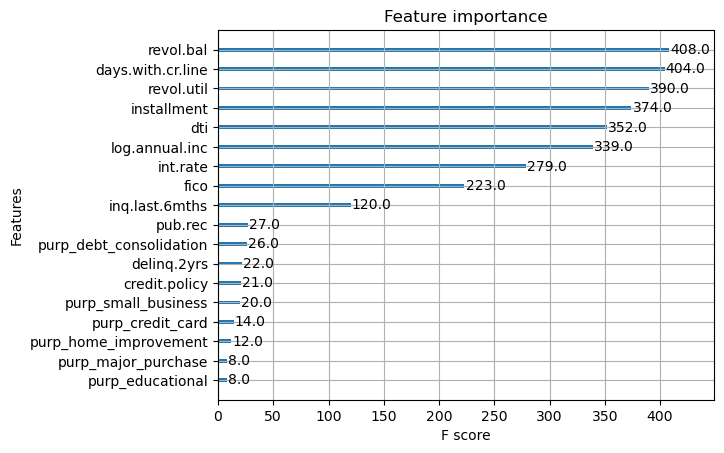

In [72]:
#features importance visualization
xgb.plot_importance(xgbm)

In [73]:
#I will try to drop features with low meaning from dataset
X1 = df.drop(['not.fully.paid', 'purp_credit_card', 'purp_educational', 'purp_major_purchase', 
            'purp_debt_consolidation', 'purp_home_improvement',
            'purp_small_business', 'delinq.2yrs', 'pub.rec'], axis = 1)
y1 = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state= 42)

In [74]:
xgbm1 = xgb.XGBClassifier()

xgbm1.fit(X_train, y_train)

train_score_x1=xgbm1.score(X_train,y_train)
test_score_x1=xgbm1.score(X_test,y_test)

scores_x1 = cross_val_score(xgbm1, X1, y1, cv=5)
av_scores_x1 = np.mean(scores_x1)

print('Train Score', train_score_x1)
print('Test Score', test_score_x1)
print('Cross-validation scores:', scores_x1)
print('Average CV score:', av_scores_x1)

Train Score 0.9573389021479713
Test Score 0.8274182324286709
Cross-validation scores: [0.82724426 0.83455115 0.83507307 0.8229765  0.29295039]
Average CV score: 0.7225590737884082


In [75]:
y_pred_x1 = xgbm1.predict(X_test)

report_x1 = classification_report(y_test, y_pred_x, output_dict=True)

precision_01 = round(report_x1['0']['precision'], 4)
recall_01 = round(report_x1['0']['recall'], 4)
f1_01 = round(report_x1['0']['f1-score'], 4)

precision_11 = round(report_x1['1']['precision'], 4)
recall_11 = round(report_x1['1']['recall'], 4)
f1_11 = round(report_x1['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_01)
print("Recall:", recall_01)
print("F1-score:", f1_01)
print()
print("Class 1:")
print("Precision:", precision_11)
print("Recall:", recall_11)
print("F1-score:", f1_11)

Class 0:
Precision: 0.8449
Recall: 0.9705
F1-score: 0.9034

Class 1:
Precision: 0.3426
Recall: 0.0794
F1-score: 0.1289


In [76]:
mx1=confusion_matrix(y_test, y_pred_x1)
tn_mx1 = mx1[0, 0]  # True Negative
fp_mx1 = mx1[0, 1]  # False Positive
fn_mx1 = mx1[1, 0]  # False Negative
tp_mx1 = mx1[1, 1]  # True Positive


print("Confusion Matrix:")
print(mx1)
print()
print("True Negative (TN):", tn_mx1)
print("False Positive (FP):", fp_mx1)
print("False Negative (FN):", fn_mx1)
print("True Positive (TP):", tp_mx1)

Confusion Matrix:
[[2341   67]
 [ 429   37]]

True Negative (TN): 2341
False Positive (FP): 67
False Negative (FN): 429
True Positive (TP): 37


In [77]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_x1,
        'accuracy test': test_score_x1,
        'average CV score': av_scores_x1,
        'precision_0': precision_01,
        'precision_1': precision_11,
        'recall_0': recall_01,
        'recall_1': recall_11,
        'f1_0': f1_01,
        'f1_1': f1_11
    }
    

models_dict['XGBoost_dropped_features'] = metrics_dict
# print(models_dict)

In [78]:
#it can be seen that dropping features with low importance did not influence the predict

In [79]:
booster = xgbm.get_booster()
print(booster.get_dump()[0])

0:[credit.policy<1] yes=1,no=2,missing=1
	1:[inq.last.6mths<6] yes=3,no=4,missing=3
		3:[int.rate<0.160400003] yes=7,no=8,missing=7
			7:[dti<0.25] yes=15,no=16,missing=15
				15:[installment<120.415001] yes=31,no=32,missing=31
					31:leaf=-0.0666666701
					32:leaf=0.360000014
				16:[log.annual.inc<8.90777206] yes=33,no=34,missing=33
					33:[log.annual.inc<8.73953629] yes=57,no=58,missing=57
						57:leaf=-0.150000006
						58:leaf=0.300000012
					34:[int.rate<0.0935499966] yes=59,no=60,missing=59
						59:leaf=-0.506250024
						60:leaf=-0.321512401
			8:[purp_small_business<1] yes=17,no=18,missing=17
				17:[int.rate<0.16929999] yes=35,no=36,missing=35
					35:[int.rate<0.167050004] yes=61,no=62,missing=61
						61:leaf=-0.120000005
						62:leaf=0.257142872
					36:[pub.rec<1] yes=63,no=64,missing=63
						63:leaf=-0.317647099
						64:leaf=0.0545454584
				18:[installment<219.709991] yes=37,no=38,missing=37
					37:leaf=-0.300000012
					38:[int.rate<0.193000004] yes=65,no=66,

In [80]:
#I will try to tune the parameters of XGBoost Model
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [81]:
params = {
    'n_estimators': 10,
    'max_depth': 30,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'min_child_weight': 1,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stopping_rounds': 10
}


In [82]:
from sklearn.model_selection import StratifiedKFold

xgb_model_2 = xgb.XGBClassifier(**params)

# Train the model with early stopping
xgb_model_2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Make predictions on the test set
y_pred_2 = xgb_model_2.predict(X_test)


train_score_x2=xgb_model_2.score(X_train,y_train)
test_score_x2=xgb_model_2.score(X_test,y_test)

# Evaluate using stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)
scores_x2 = cross_val_score(xgb_model_2, X, y, cv=skf)
av_scores_x2 = np.mean(scores_x2)

print("Metrics without class weighting:")
print('Train Score', train_score_x2)
print('Test Score', test_score_x2)
print('Cross-validation scores:', scores_x2)
print('Average CV score:', av_scores_x2)

Metrics without class weighting:
Train Score 0.9045346062052506
Test Score 0.8336812804453723
Cross-validation scores: [nan nan nan nan nan]
Average CV score: nan


C:\Users\liman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\liman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\liman\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\liman\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "C:\Users\liman\anaconda3\lib\site-packages\xgboost\core.py", line 620, i

In [83]:
# Calculate class weights based on class frequencies
class_weights = len(y) / (2 * np.bincount(y))
average_class_weight = np.mean(class_weights)

# Create a new XGBClassifier with class weighting
weighted_classifier = xgb.XGBClassifier(scale_pos_weight=average_class_weight, max_depth=30, 
                                       learning_rate=0.1,  
                                       n_estimators=10)


# Fit the classifier with class weighting
weighted_classifier.fit(X_train, y_train)

# Make predictions on the test set
weighted_y_pred = weighted_classifier.predict(X_test)

# Calculate metrics with class weighting
train_score_x3=weighted_classifier.score(X_train,y_train)
test_score_x3=weighted_classifier.score(X_test,y_test)

scores_x3 = cross_val_score(weighted_classifier, X, y)
av_scores_x3 = np.mean(scores_x3)

print("Metrics with class weighting:")
print('Train Score', train_score_x3)
print('Test Score', test_score_x3)
print('Cross-validation scores:', scores_x3)
print('Average CV score:', av_scores_x3)

Metrics with class weighting:
Train Score 0.9937350835322196
Test Score 0.8086290883785665
Cross-validation scores: [0.81993737 0.80949896 0.81784969 0.80261097 0.28981723]
Average CV score: 0.7079428421919032


In [84]:
report_x3 = classification_report(y_test, weighted_y_pred, output_dict=True)

precision_03 = round(report_x3['0']['precision'], 4)
recall_03 = round(report_x3['0']['recall'], 4)
f1_03 = round(report_x3['0']['f1-score'], 4)

precision_13 = round(report_x3['1']['precision'], 4)
recall_13 = round(report_x3['1']['recall'], 4)
f1_13 = round(report_x3['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_03)
print("Recall:", recall_03)
print("F1-score:", f1_03)
print()
print("Class 1:")
print("Precision:", precision_13)
print("Recall:", recall_13)
print("F1-score:", f1_13)

Class 0:
Precision: 0.8551
Recall: 0.9295
F1-score: 0.8907

Class 1:
Precision: 0.3254
Recall: 0.1775
F1-score: 0.2297


In [85]:
mx3=confusion_matrix(y_test, weighted_y_pred)
tn_mx3 = mx3[0, 0]  # True Negative
fp_mx3 = mx3[0, 1]  # False Positive
fn_mx3 = mx3[1, 0]  # False Negative
tp_mx3 = mx3[1, 1]  # True Positive


print("Confusion Matrix:")
print(mx3)
print()
print("True Negative (TN):", tn_mx3)
print("False Positive (FP):", fp_mx3)
print("False Negative (FN):", fn_mx3)
print("True Positive (TP):", tp_mx3)

Confusion Matrix:
[[1121   85]
 [ 190   41]]

True Negative (TN): 1121
False Positive (FP): 85
False Negative (FN): 190
True Positive (TP): 41


In [86]:
#weighting did not influence the results

In [87]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_x3,
        'accuracy test': test_score_x3,
        'average CV score': av_scores_x3,
        'precision_0': precision_03,
        'precision_1': precision_13,
        'recall_0': recall_03,
        'recall_1': recall_13,
        'f1_0': f1_03,
        'f1_1': f1_13
    }
    

models_dict['XGBoost_weighted_f'] = metrics_dict
# print(models_dict)

In [88]:
#Before starting VotingClassifier, we should choose the models with best parameters
df_scores = pd.DataFrame.from_dict(models_dict, orient='index')
df_scores

accuracy train  accuracy test  \
DecisionTreeClassifier               0.867200       0.830500   
DecTreeClassImportantFeatures        0.869000       0.825000   
DecTreeClassEllEnvelope              0.869400       0.833300   
LogisticRegression                   0.839800       0.837900   
LogRegresStandScaler                 0.839900       0.838200   
LogisticRegressionMinMax             0.841736       0.838553   
RandomForest                         0.967780       0.815936   
XGBoost                              0.960471       0.826026   
XGBoost_dropped_features             0.957339       0.827418   
XGBoost_weighted_f                   0.993735       0.808629   

                               average CV score  precision_0  precision_1  \
DecisionTreeClassifier                 0.718300       0.8479       0.4071   
DecTreeClassImportantFeatures          0.722700       0.8452       0.3391   
DecTreeClassEllEnvelope                0.722700       0.8554       0.3028   
LogisticRegression                     0.839600       0.8397       0.5000   
LogRegresStandScaler                   0.840100       0.8456       0.1629   
LogisticRegressionMinMax               0.841289       0.8408       0.5455   
RandomForest                           0.719949       0.8428       0.2632   
XGBoost                                0.723916       0.8449       0.3426   
XGBoost_dropped_features               0.722559       0.8449       0.3426   
XGBoost_weighted_f                     0.707943       0.8551       0.3254   

                               recall_0  recall_1    f1_0    f1_1  
DecisionTreeClassifier           0.9722    0.0987  0.9058  0.1589  
DecTreeClassImportantFeatures    0.9684    0.0837  0.9027  0.1343  
DecTreeClassEllEnvelope          0.9672    0.0801  0.9079  0.1267  
LogisticRegression               0.9967    0.0172  0.9115  0.0332  
LogRegresStandScaler             0.0909    0.9142  0.1642  0.2765  
LogisticRegressionMinMax         0.9958    0.0258  0.9118  0.0492  
RandomForest                     0.9593    0.0751  0.8973  0.1169  
XGBoost                          0.9705    0.0794  0.9034  0.1289  
XGBoost_dropped_features         0.9705    0.0794  0.9034  0.1289  
XGBoost_weighted_f               0.9295    0.1775  0.8907  0.2297

In [89]:
#From the results we can see that there is a significant imbalance between precision of classification of '0' and "1".
#I think that this can be explained by non-equal amount of '0' and "1" data in the initial set.
#

In [90]:
#VotingClassifier for all models
from sklearn.ensemble import VotingClassifier

#take the models with the best parameters - and more balanced precision in '0' and '1' classes
treemodel = DecisionTreeClassifier(max_depth=8, random_state= 42)
lr_minmax = LogisticRegression(max_iter=1000)
forest = RandomForestClassifier(n_estimators=7, max_depth=22, random_state=42)
weighted_classifier = xgb.XGBClassifier(scale_pos_weight=average_class_weight, max_depth=30, 
                                       learning_rate=0.1,  
                                       n_estimators=10)

models = [('DecisionTree', treemodel), ('LogisticRegression', lr_minmax),
          ('RandomForest', forest), ('XGBweighted', weighted_classifier)]
ensemble_hard = VotingClassifier(estimators=models, voting='hard')
ensemble_hard.fit(X_train, y_train)
predictions_hard = ensemble_hard.predict(X_test)


In [91]:
train_score_VH=ensemble_hard.score(X_train,y_train)
test_score_VH=ensemble_hard.score(X_test,y_test)

scores_VH = cross_val_score(ensemble_hard, X, y, cv=5)
av_scores_VH = np.mean(scores_VH)

print('Train Score', train_score_VH)
print('Test Score', test_score_VH)
print('Cross-validation scores:', scores_VH)
print('Average CV score:', av_scores_VH)

Train Score 0.8705250596658711
Test Score 0.837160751565762
Cross-validation scores: [0.83924843 0.83768267 0.83924843 0.83655352 0.29556136]
Average CV score: 0.7296588846432679


In [92]:
report_VH = classification_report(y_test, predictions_hard, output_dict=True)

precision_0VH = round(report_VH['0']['precision'], 4)
recall_0VH = round(report_VH['0']['recall'], 4)
f1_0VH = round(report_VH['0']['f1-score'], 4)

precision_1VH = round(report_VH['1']['precision'], 4)
recall_1VH = round(report_VH['1']['recall'], 4)
f1_1VH = round(report_VH['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0VH)
print("Recall:", recall_0VH)
print("F1-score:", f1_0VH)
print()
print("Class 1:")
print("Precision:", precision_1VH)
print("Recall:", recall_1VH)
print("F1-score:", f1_1VH)

Class 0:
Precision: 0.8413
Recall: 0.9934
F1-score: 0.911

Class 1:
Precision: 0.3846
Recall: 0.0216
F1-score: 0.041


In [93]:
vh=confusion_matrix(y_test, predictions_hard)
tn_vh = vh[0, 0]  # True Negative
fp_vh = vh[0, 1]  # False Positive
fn_vh = vh[1, 0]  # False Negative
tp_vh = vh[1, 1]  # True Positive


print("Confusion Matrix:")
print(vh)
print()
print("True Negative (TN):", tn_vh)
print("False Positive (FP):", fp_vh)
print("False Negative (FN):", fn_vh)
print("True Positive (TP):", tp_vh)

Confusion Matrix:
[[1198    8]
 [ 226    5]]

True Negative (TN): 1198
False Positive (FP): 8
False Negative (FN): 226
True Positive (TP): 5


In [94]:
# Create the VotingClassifier with soft voting
ensemble_soft = VotingClassifier(estimators=models, voting='soft')

ensemble_soft.fit(X_train, y_train)

predictions_soft = ensemble_soft.predict(X_test)

In [95]:
train_score_VS=ensemble_soft.score(X_train,y_train)
test_score_VS=ensemble_soft.score(X_test,y_test)

scores_VS = cross_val_score(ensemble_soft, X, y, cv=5)
av_scores_VS = np.mean(scores_VS)

print('Train Score', train_score_VS)
print('Test Score', test_score_VS)
print('Cross-validation scores:', scores_VS)
print('Average CV score:', av_scores_VS)

Train Score 0.8836515513126492
Test Score 0.8392484342379958
Cross-validation scores: [0.83611691 0.83455115 0.83820459 0.83498695 0.29503916]
Average CV score: 0.7277797522035135


In [96]:
report_VS = classification_report(y_test, predictions_soft, output_dict=True)

precision_0VS = round(report_VS['0']['precision'], 4)
recall_0VS = round(report_VS['0']['recall'], 4)
f1_0VS = round(report_VS['0']['f1-score'], 4)

precision_1VS = round(report_VS['1']['precision'], 4)
recall_1VS = round(report_VS['1']['recall'], 4)
f1_1VS = round(report_VS['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0VS)
print("Recall:", recall_0VS)
print("F1-score:", f1_0VS)
print()
print("Class 1:")
print("Precision:", precision_1VS)
print("Recall:", recall_1VS)
print("F1-score:", f1_1VS)

Class 0:
Precision: 0.8475
Recall: 0.9859
F1-score: 0.9115

Class 1:
Precision: 0.5
Recall: 0.0736
F1-score: 0.1283


In [97]:
vs=confusion_matrix(y_test, predictions_soft)
tn_vs = vs[0, 0]  # True Negative
fp_vs = vs[0, 1]  # False Positive
fn_vs = vs[1, 0]  # False Negative
tp_vs = vs[1, 1]  # True Positive


print("Confusion Matrix:")
print(vs)
print()
print("True Negative (TN):", tn_vs)
print("False Positive (FP):", fp_vs)
print("False Negative (FN):", fn_vs)
print("True Positive (TP):", tp_vs)

Confusion Matrix:
[[1189   17]
 [ 214   17]]

True Negative (TN): 1189
False Positive (FP): 17
False Negative (FN): 214
True Positive (TP): 17


In [98]:
#VotingSoft gave better results than VotingHard

In [99]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_VS,
        'accuracy test': test_score_VS,
        'average CV score': av_scores_VS,
        'precision_0': precision_0VS,
        'precision_1': precision_1VS,
        'recall_0': recall_0VS,
        'recall_1': recall_1VS,
        'f1_0': f1_0VS,
        'f1_1': f1_1VS
    }
    

models_dict['VotingSoft'] = metrics_dict
# print(models_dict)

In [100]:
df_scores = pd.DataFrame.from_dict(models_dict, orient='index')
df_scores

accuracy train  accuracy test  \
DecisionTreeClassifier               0.867200       0.830500   
DecTreeClassImportantFeatures        0.869000       0.825000   
DecTreeClassEllEnvelope              0.869400       0.833300   
LogisticRegression                   0.839800       0.837900   
LogRegresStandScaler                 0.839900       0.838200   
LogisticRegressionMinMax             0.841736       0.838553   
RandomForest                         0.967780       0.815936   
XGBoost                              0.960471       0.826026   
XGBoost_dropped_features             0.957339       0.827418   
XGBoost_weighted_f                   0.993735       0.808629   
VotingSoft                           0.883652       0.839248   

                               average CV score  precision_0  precision_1  \
DecisionTreeClassifier                 0.718300       0.8479       0.4071   
DecTreeClassImportantFeatures          0.722700       0.8452       0.3391   
DecTreeClassEllEnvelope                0.722700       0.8554       0.3028   
LogisticRegression                     0.839600       0.8397       0.5000   
LogRegresStandScaler                   0.840100       0.8456       0.1629   
LogisticRegressionMinMax               0.841289       0.8408       0.5455   
RandomForest                           0.719949       0.8428       0.2632   
XGBoost                                0.723916       0.8449       0.3426   
XGBoost_dropped_features               0.722559       0.8449       0.3426   
XGBoost_weighted_f                     0.707943       0.8551       0.3254   
VotingSoft                             0.727780       0.8475       0.5000   

                               recall_0  recall_1    f1_0    f1_1  
DecisionTreeClassifier           0.9722    0.0987  0.9058  0.1589  
DecTreeClassImportantFeatures    0.9684    0.0837  0.9027  0.1343  
DecTreeClassEllEnvelope          0.9672    0.0801  0.9079  0.1267  
LogisticRegression               0.9967    0.0172  0.9115  0.0332  
LogRegresStandScaler             0.0909    0.9142  0.1642  0.2765  
LogisticRegressionMinMax         0.9958    0.0258  0.9118  0.0492  
RandomForest                     0.9593    0.0751  0.8973  0.1169  
XGBoost                          0.9705    0.0794  0.9034  0.1289  
XGBoost_dropped_features         0.9705    0.0794  0.9034  0.1289  
XGBoost_weighted_f               0.9295    0.1775  0.8907  0.2297  
VotingSoft                       0.9859    0.0736  0.9115  0.1283

In [101]:
#VotingEnsemble did not make results better

In [102]:
!pip install imbalanced-learn


[notice] A new release of pip available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
from imblearn.over_sampling import SMOTE

# Create the oversampler
oversampler = SMOTE(random_state=42)

# Apply SMOTE oversampling to your dataset
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [104]:
# Create the soft voting classifier
ensemble_soft_smote = VotingClassifier(estimators=models, voting='soft')

# Fit the ensemble classifier using the resampled data
ensemble_soft_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
predictions_soft_smote = ensemble_soft_smote.predict(X_test)

In [105]:
train_score_smote=ensemble_soft_smote.score(X_train,y_train)
test_score_smote=ensemble_soft_smote.score(X_test,y_test)

scores_smote = cross_val_score(ensemble_soft_smote, X, y, cv=5)
av_scores_smote = np.mean(scores_smote)

print('Train Score', train_score_smote)
print('Test Score', test_score_smote)
print('Cross-validation scores:', scores_smote)
print('Average CV score:', av_scores_smote)

Train Score 0.8785799522673031
Test Score 0.7411273486430062
Cross-validation scores: [0.83611691 0.83455115 0.83820459 0.83498695 0.29503916]
Average CV score: 0.7277797522035135


In [106]:
report_sm = classification_report(y_test, predictions_soft_smote, output_dict=True)

precision_0sm = round(report_sm['0']['precision'], 4)
recall_0sm = round(report_sm['0']['recall'], 4)
f1_0sm = round(report_sm['0']['f1-score'], 4)

precision_1sm = round(report_sm['1']['precision'], 4)
recall_1sm = round(report_sm['1']['recall'], 4)
f1_1sm = round(report_sm['1']['f1-score'], 4)

print("Class 0:")
print("Precision:", precision_0sm)
print("Recall:", recall_0sm)
print("F1-score:", f1_0sm)
print()
print("Class 1:")
print("Precision:", precision_1sm)
print("Recall:", recall_1sm)
print("F1-score:", f1_1sm)

Class 0:
Precision: 0.8614
Recall: 0.8242
F1-score: 0.8424

Class 1:
Precision: 0.2509
Recall: 0.3074
F1-score: 0.2763


In [107]:
sm=confusion_matrix(y_test, predictions_soft_smote)
tn_sm = sm[0, 0]  # True Negative
fp_sm = sm[0, 1]  # False Positive
fn_sm = sm[1, 0]  # False Negative
tp_sm = sm[1, 1]  # True Positive


print("Confusion Matrix:")
print(sm)
print()
print("True Negative (TN):", tn_sm)
print("False Positive (FP):", fp_sm)
print("False Negative (FN):", fn_sm)
print("True Positive (TP):", tp_sm)

Confusion Matrix:
[[994 212]
 [160  71]]

True Negative (TN): 994
False Positive (FP): 212
False Negative (FN): 160
True Positive (TP): 71


In [108]:
#add results to dict
metrics_dict = {
        'accuracy train': train_score_smote,
        'accuracy test': test_score_smote,
        'average CV score': av_scores_smote,
        'precision_0': precision_0sm,
        'precision_1': precision_1sm,
        'recall_0': recall_0sm,
        'recall_1': recall_1sm,
        'f1_0': f1_0sm,
        'f1_1': f1_1sm
    }
    

models_dict['VotingSoftSmote'] = metrics_dict
# print(models_dict)

In [109]:
df_scores = pd.DataFrame.from_dict(models_dict, orient='index')
df_scores

accuracy train  accuracy test  \
DecisionTreeClassifier               0.867200       0.830500   
DecTreeClassImportantFeatures        0.869000       0.825000   
DecTreeClassEllEnvelope              0.869400       0.833300   
LogisticRegression                   0.839800       0.837900   
LogRegresStandScaler                 0.839900       0.838200   
LogisticRegressionMinMax             0.841736       0.838553   
RandomForest                         0.967780       0.815936   
XGBoost                              0.960471       0.826026   
XGBoost_dropped_features             0.957339       0.827418   
XGBoost_weighted_f                   0.993735       0.808629   
VotingSoft                           0.883652       0.839248   
VotingSoftSmote                      0.878580       0.741127   

                               average CV score  precision_0  precision_1  \
DecisionTreeClassifier                 0.718300       0.8479       0.4071   
DecTreeClassImportantFeatures          0.722700       0.8452       0.3391   
DecTreeClassEllEnvelope                0.722700       0.8554       0.3028   
LogisticRegression                     0.839600       0.8397       0.5000   
LogRegresStandScaler                   0.840100       0.8456       0.1629   
LogisticRegressionMinMax               0.841289       0.8408       0.5455   
RandomForest                           0.719949       0.8428       0.2632   
XGBoost                                0.723916       0.8449       0.3426   
XGBoost_dropped_features               0.722559       0.8449       0.3426   
XGBoost_weighted_f                     0.707943       0.8551       0.3254   
VotingSoft                             0.727780       0.8475       0.5000   
VotingSoftSmote                        0.727780       0.8614       0.2509   

                               recall_0  recall_1    f1_0    f1_1  
DecisionTreeClassifier           0.9722    0.0987  0.9058  0.1589  
DecTreeClassImportantFeatures    0.9684    0.0837  0.9027  0.1343  
DecTreeClassEllEnvelope          0.9672    0.0801  0.9079  0.1267  
LogisticRegression               0.9967    0.0172  0.9115  0.0332  
LogRegresStandScaler             0.0909    0.9142  0.1642  0.2765  
LogisticRegressionMinMax         0.9958    0.0258  0.9118  0.0492  
RandomForest                     0.9593    0.0751  0.8973  0.1169  
XGBoost                          0.9705    0.0794  0.9034  0.1289  
XGBoost_dropped_features         0.9705    0.0794  0.9034  0.1289  
XGBoost_weighted_f               0.9295    0.1775  0.8907  0.2297  
VotingSoft                       0.9859    0.0736  0.9115  0.1283  
VotingSoftSmote                  0.8242    0.3074  0.8424  0.2763

In [110]:
#Balancing the dataset with SMOTE did not help to improve the results

<b> Результати: Нерівна кількість класів "0" та "1" призвела до того, що передбачення "0" та "1" класів значно відрізнялися,
    а саме - "0" клас з набагато більшою вибіркою передбачався набагато краще в усіх типах моделей. 
    На жаль, результати
    передбачення класу "1" були невисокими. Тому я оцінювала метрики для обох класів окремо -  намагалася знайти моделі,
    які б набагато менше помилялися саме при передбаченні класу "1". 
    Такими моделями виявилися LogisticRegression - особливо після застосування шкалювання, VotingSoft з використанням
    усіх моделей (серед логістичних регресій я брала з MinMax шкалюванням, XGBoost - зі зваженням ознак) і 
    DecisionTreeClassifier. 

In [111]:
#Пробачте за довгий код ! - дуже хотілося все ретельно спробувати і покроково зрозуміти

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [112]:
import pandas as pd
import numpy as np


In [113]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [114]:
df = pd.read_csv(url)
df

city country                   date.utc            location parameter  \
0      Paris      FR  2019-06-21 00:00:00+00:00             FR04014       no2   
1      Paris      FR  2019-06-20 23:00:00+00:00             FR04014       no2   
2      Paris      FR  2019-06-20 22:00:00+00:00             FR04014       no2   
3      Paris      FR  2019-06-20 21:00:00+00:00             FR04014       no2   
4      Paris      FR  2019-06-20 20:00:00+00:00             FR04014       no2   
...      ...     ...                        ...                 ...       ...   
2063  London      GB  2019-05-07 06:00:00+00:00  London Westminster       no2   
2064  London      GB  2019-05-07 04:00:00+00:00  London Westminster       no2   
2065  London      GB  2019-05-07 03:00:00+00:00  London Westminster       no2   
2066  London      GB  2019-05-07 02:00:00+00:00  London Westminster       no2   
2067  London      GB  2019-05-07 01:00:00+00:00  London Westminster       no2   

      value   unit  
0      20.0  µg/m³  
1      21.8  µg/m³  
2      26.5  µg/m³  
3      24.9  µg/m³  
4      21.4  µg/m³  
...     ...    ...  
2063   26.0  µg/m³  
2064   16.0  µg/m³  
2065   19.0  µg/m³  
2066   19.0  µg/m³  
2067   23.0  µg/m³  

[2068 rows x 7 columns]

In [115]:
# get unique cities
unique_cities = df['city'].unique()
unique_cities

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [116]:
# get the first and last dates
first_date = df['date.utc'].min()
last_date = df['date.utc'].max()
print("First date:", first_date)
print("Last date:", last_date)

First date: 2019-05-07 01:00:00+00:00
Last date: 2019-06-21 00:00:00+00:00


In [117]:
#average concentration of 𝑁𝑂2 per day of week and city

#convert to `datetime` type
df["date.utc"] = pd.to_datetime(df["date.utc"])
#find the certain day of week
df['day_of_week'] = df['date.utc'].dt.strftime('%A')

#range day of week one by one, not by alphabet
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=custom_order, ordered=True)
df = df.sort_values('day_of_week')
df

city country                  date.utc            location  \
1033  Antwerpen      BE 2019-05-20 15:00:00+00:00             BETR801   
1102     London      GB 2019-06-17 08:00:00+00:00  London Westminster   
1103     London      GB 2019-06-17 07:00:00+00:00  London Westminster   
1104     London      GB 2019-06-17 06:00:00+00:00  London Westminster   
1105     London      GB 2019-06-17 05:00:00+00:00  London Westminster   
...         ...     ...                       ...                 ...   
1279     London      GB 2019-06-09 13:00:00+00:00  London Westminster   
1278     London      GB 2019-06-09 14:00:00+00:00  London Westminster   
1277     London      GB 2019-06-09 15:00:00+00:00  London Westminster   
1284     London      GB 2019-06-09 08:00:00+00:00  London Westminster   
389       Paris      FR 2019-06-02 01:00:00+00:00             FR04014   

     parameter  value   unit day_of_week  
1033       no2   25.5  µg/m³      Monday  
1102       no2   13.0  µg/m³      Monday  
1103       no2   13.0  µg/m³      Monday  
1104       no2   12.0  µg/m³      Monday  
1105       no2   11.0  µg/m³      Monday  
...        ...    ...    ...         ...  
1279       no2   13.0  µg/m³      Sunday  
1278       no2   17.0  µg/m³      Sunday  
1277       no2   19.0  µg/m³      Sunday  
1284       no2    0.0  µg/m³      Sunday  
389        no2   38.2  µg/m³      Sunday  

[2068 rows x 8 columns]

In [118]:
#make groups of certain cities and days of week and find the average
df_avg_conc_day = df.groupby(['city', 'day_of_week']).mean('value')
df_avg_conc_day

value
city      day_of_week           
Antwerpen Monday       27.875000
          Tuesday      22.214286
          Wednesday    21.125000
          Thursday     27.500000
          Friday       28.400000
          Saturday     33.500000
          Sunday       21.896552
London    Monday       23.969697
          Tuesday      24.885714
          Wednesday    23.460432
          Thursday     24.780142
          Friday       26.446809
          Saturday     24.977612
          Sunday       24.859155
Paris     Monday       24.856250
          Tuesday      30.999359
          Wednesday    29.165753
          Thursday     28.600690
          Friday       31.617986
          Saturday     25.266154
          Sunday       23.274306

In [119]:
#average concentration of 𝑁𝑂2 per hour
df_hourly = df.rename(columns={'date.utc': 'hour'})
df_hourly = df_hourly.set_index('hour')


In [120]:
hourly_mean = df.groupby(df_hourly.index.hour).mean()
hourly_mean
hourly_mean = hourly_mean.reset_index()
hourly_mean

hour      value
0      0  27.955294
1      1  26.125688
2      2  23.558511
3      3  23.242683
4      4  22.979518
5      5  27.070732
6      6  30.635632
7      7  31.346591
8      8  29.138636
9      9  26.071591
10    10  22.602326
11    11  21.275294
12    12  21.029762
13    13  21.008235
14    14  21.737647
15    15  23.840000
16    16  24.972619
17    17  26.691667
18    18  27.089412
19    19  28.143529
20    20  29.372941
21    21  30.973256
22    22  32.451282
23    23  31.189412

C:\Users\liman\AppData\Local\Temp\ipykernel_3396\4030615257.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



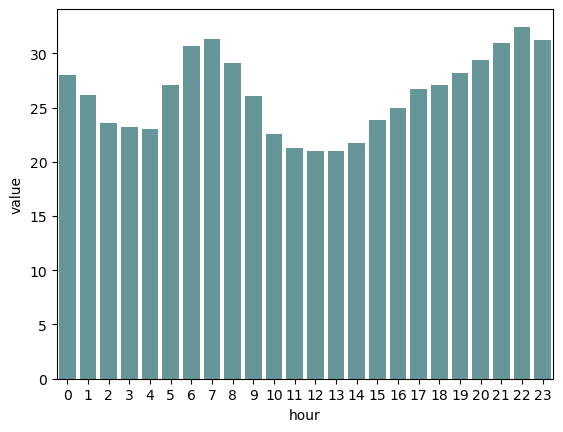

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

#Bar
sns.barplot(x = 'hour', y = 'value', data = hourly_mean,
            color = 'cadetblue',ci=None 
            )
plt.show();